In [1]:
def function1(input1):
    return input1 + " From First Function"

def function2(input2):
    return input2 + " From Second Function"

In [2]:
# Create my graph
from langgraph.graph  import Graph # Import graph class


In [3]:
workflow1=Graph() # Object creation

In [4]:
workflow1.add_node("function1",function1) # add node along with function name and function


In [5]:
workflow1.add_node("function2",function2) # add node along with function name and function

In [6]:
# Add edges from F1 To F2
workflow1.add_edge("function1","function2")


In [7]:
# Entry Point
workflow1.set_entry_point("function1")

In [8]:
# Finish point
workflow1.set_finish_point("function2")

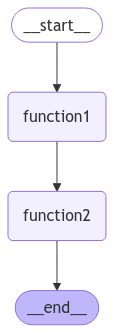

In [9]:
# Compile
workflow1.compile()

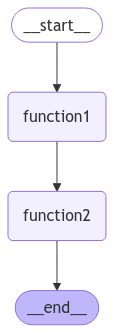

In [10]:
# Visualize 
app1=workflow1.compile()

from IPython.display import Image,display
try:
    display(Image(app1.get_graph().draw_mermaid_png()))
except Exception as e:
    print(e)

In [11]:
# Execute the workflow
app1.invoke("My name is Priyanshu Dey") # Concatenate

'My name is Priyanshu Dey From First Function From Second Function'

In [12]:
input="My name is Priyanshu Dey"

for output in app1.stream(input): # Stream is used from single single output
    for key,value in output.items(): # Key is the node name value is output 
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")


here is output from function1
_______
My name is Priyanshu Dey From First Function


here is output from function2
_______
My name is Priyanshu Dey From First Function From Second Function




In [13]:
# Show this later on
# Separate entity
# Not present in the workflow
# But we can call it from and function present in the workflow (Function1 or function 2)
def function3(input3):
    return input3

In [14]:
def function1(input1):
    return input1 + " From First Function"

def function2(input2):
    output=function3(" This is Function 3")
    return input2 + "" + output + " From Second Function"

In [15]:
from langgraph.graph  import Graph
workflow1=Graph() # Object
workflow1.add_node("function1",function1) # add node along with function name and function
workflow1.add_node("function2",function2) # add node along with function name and function
workflow1.add_edge("function1","function2")
workflow1.set_entry_point("function1")
workflow1.set_finish_point("function2")
app1=workflow1.compile()


In [16]:
# Execute the workflow
app1.invoke("My name is Priyanshu Dey") # Concatenate

'My name is Priyanshu Dey From First Function This is Function 3 From Second Function'

In [17]:
input="My name is Priyanshu Dey"

for output in app1.stream(input): # Stream is used from single single output
    for key,value in output.items(): # Key is the node name value is output 
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from function1
_______
My name is Priyanshu Dey From First Function


here is output from function2
_______
My name is Priyanshu Dey From First Function This is Function 3 From Second Function




# Now Create Workflow using LLM

In [18]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
llm.invoke("hi").content

c:\Users\HP\anaconda3\envs\ten\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'Hi there! How can I help you today?\n'

In [19]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
    response=llm.invoke(input).content
    return response

In [20]:
# Convert evrything to upper case
def function2(input):
    upper_case=input.upper()
    return upper_case

In [21]:
from langgraph.graph  import Graph
workflow2=Graph() 

In [22]:
workflow2.add_node("llm",function1)

In [23]:
workflow2.add_node("upper_string",function2)

In [24]:
workflow2.add_edge("llm","upper_string")

In [25]:
workflow2.set_entry_point("llm")
workflow2.set_finish_point("upper_string")

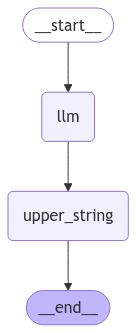

In [26]:
workflow2.compile()

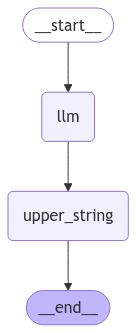

In [27]:
app2=workflow2.compile()
from IPython.display import Image, display

try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [28]:
app2.invoke("what is a name of first indian prime minister?")


'THE FIRST PRIME MINISTER OF INDIA WAS **JAWAHARLAL NEHRU**.\n'

In [29]:
print(app2.invoke("what is genai explain in detail?"))

OKAY, LET'S DIVE DEEP INTO THE WORLD OF GENAI, OR GENERATIVE AI.

**WHAT IS GENAI?**

AT ITS CORE, GENERATIVE AI IS A SUBSET OF ARTIFICIAL INTELLIGENCE THAT FOCUSES ON CREATING **NEW CONTENT**. UNLIKE TRADITIONAL AI, WHICH IS PRIMARILY DESIGNED TO ANALYZE EXISTING DATA AND MAKE PREDICTIONS OR CLASSIFICATIONS, GENAI AIMS TO *GENERATE* NOVEL OUTPUTS THAT RESEMBLE THE DATA IT WAS TRAINED ON. THINK OF IT AS AN AI THAT CAN LEARN PATTERNS AND THEN USE THOSE PATTERNS TO CREATE SOMETHING NEW.

**KEY CONCEPTS AND PRINCIPLES:**

* **LEARNING FROM DATA:** GENAI MODELS LEARN FROM MASSIVE DATASETS. THESE DATASETS CAN INCLUDE TEXT, IMAGES, AUDIO, VIDEO, CODE, AND EVEN MOLECULAR STRUCTURES. THE MODELS ANALYZE THESE DATA TO IDENTIFY UNDERLYING PATTERNS, STRUCTURES, AND RELATIONSHIPS.
* **NEURAL NETWORKS:** THE MOST COMMON ARCHITECTURE USED IN GENAI IS THE NEURAL NETWORK, SPECIFICALLY DEEP LEARNING MODELS. THESE NETWORKS ARE INSPIRED BY THE STRUCTURE OF THE HUMAN BRAIN, CONSISTING OF INTERCONNECTED NOD

In [30]:
input="what is a name of first indian prime minister?"

In [31]:
for output in app2.stream(input):
    for key,value in output.items():
        print(f"here is output from {key}")
        print("_______")
        print(value)
        print("\n")

here is output from llm
_______
The first Prime Minister of India was **Jawaharlal Nehru**.



here is output from upper_string
_______
THE FIRST PRIME MINISTER OF INDIA WAS **JAWAHARLAL NEHRU**.





# Here lets create our own output token counter

In [32]:
def function3(input):
    token=input.split()
    token_number=len(token)
    token_number=f"total token number is {token_number}"
    return token_number

In [33]:
def function1(input):
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
    response=llm.invoke(input).content
    return response

In [34]:
# Convert evrything to upper case
def function2(input):
    upper_case=input.upper()
    return upper_case

In [35]:
workflow3=Graph()
workflow3.add_node("llm",function1)
workflow3.add_node("upper_string",function2)
workflow3.add_node("token_counter",function3)
workflow3.add_edge("llm","upper_string")
workflow3.add_edge("upper_string","token_counter")
workflow3.set_entry_point("llm")
workflow3.set_finish_point("token_counter")
app3=workflow3.compile()

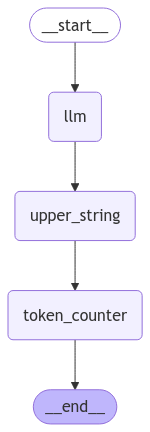

In [36]:
app3

In [37]:
app3.invoke("what is a name of first indian prime minister?")

'total token number is 9'

In [38]:

app3.invoke("what is genai explain in detail?")

'total token number is 964'

# Level 4 ( Integrate RAG Pipeline )

In [39]:
from langchain_google_genai import GoogleGenerativeAIEmbeddings
embeddings = GoogleGenerativeAIEmbeddings(model="models/embedding-001")

In [40]:
from langchain_google_genai import ChatGoogleGenerativeAI
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")

In [41]:
llm.invoke("hi").content

'Hi there! How can I help you today?\n'

In [42]:
from langchain_core.output_parsers import StrOutputParser
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_community.document_loaders import TextLoader, DirectoryLoader , PyPDFLoader
from langchain_community.vectorstores import Chroma
from langchain.text_splitter import RecursiveCharacterTextSplitter


In [43]:
loader = DirectoryLoader('Data/',
                            glob="*.pdf",  # Load Only Pdf documents
                            loader_cls=PyPDFLoader)
docs=loader.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs = text_splitter.split_documents(documents=docs)
doc_strings = [doc.page_content for doc in new_docs]

In [44]:
new_docs

[Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='Transformer'),
 Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='electrical  transformer  is a static  electrical  machine  which transforms electrical power from'),
 Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='machine  which transforms electrical power from one circuit to'),
 Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='another circuit, without changing the frequency. Transformer can increase or decrease the voltage'),
 Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='Transformer can increase or decrease the voltage with'),
 Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='corresponding decrease or increase in current.  \nWorking principle of transformer'),
 Document(metadata={'source': 'Data\\transformer.pdf', 'page': 0}, page_content='The bas

In [45]:
doc_strings 


['Transformer',
 'electrical  transformer  is a static  electrical  machine  which transforms electrical power from',
 'machine  which transforms electrical power from one circuit to',
 'another circuit, without changing the frequency. Transformer can increase or decrease the voltage',
 'Transformer can increase or decrease the voltage with',
 'corresponding decrease or increase in current.  \nWorking principle of transformer',
 'The basic  principle  behind  working  of a transformer  is the phenomenon of mutual induction',
 'is the phenomenon of mutual induction between two',
 'windings linked by common magnetic flux. The figure at right shows the simplest form of a',
 'The figure at right shows the simplest form of a transformer.',
 'Basically a transformer consists of two inductive coils; primary winding and secondary winding. The',
 'coils; primary winding and secondary winding. The coils are',
 'electrically separated but magnetically linked to ea ch other. When, primary winding 

In [46]:
db = Chroma.from_documents(new_docs, embeddings)

retriever = db.as_retriever(search_kwargs={"k": 3})

In [47]:
query = "what is Transformer?"
docs = retriever.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

C:\Users\HP\AppData\Local\Temp\ipykernel_8832\2778552116.py:2: LangChainDeprecationWarning: The method `BaseRetriever.get_relevant_documents` was deprecated in langchain-core 0.1.46 and will be removed in 1.0. Use :meth:`~invoke` instead.
  docs = retriever.get_relevant_documents(query)


{'page': 3, 'source': 'Data\\transformer.pdf'}
transformer.
page_content='transformer.' metadata={'page': 3, 'source': 'Data\\transformer.pdf'}
page_content='transformers.' metadata={'page': 2, 'source': 'Data\\transformer.pdf'}
page_content='Transformers are the most highly efficient electrical devices. Most of the transformers have full' metadata={'page': 5, 'source': 'Data\\transformer.pdf'}


In [48]:
# Generating Workflow for creating Rag

# LLM Output
def function_1(AgentState):
    
    message=AgentState["messages"]
    
    question=message[-1] # -1 For last or latest  message
    
    complete_prompt="Your task is to provide only the brief answer based on the user query. \
        Don't include too much reasoning. Following is the user query: " + question
    
    response = llm.invoke(complete_prompt)
    
    AgentState['messages'].append(response.content) # appending LLM call response to the AgentState
    
    #print(AgentState)
    
    return AgentState

In [49]:
# It is basically a dictionary , where conversation is stored
AgentState={}

In [50]:
AgentState["messages"]=[] # message will contain in form of list

In [51]:
AgentState

{'messages': []}

In [52]:
AgentState["messages"].append("hi, how are you?")

In [53]:
AgentState
# Message will be key , sentence will be value

{'messages': ['hi, how are you?']}

In [54]:
AgentState["messages"].append("hi, what you doing?")

In [55]:
AgentState

{'messages': ['hi, how are you?', 'hi, what you doing?']}

In [56]:
AgentState["messages"][0]

'hi, how are you?'

In [57]:
# RAG Output
# Agent state from first fumction will move to second function

def function_2(AgentState):
    messages = AgentState['messages']
    question = messages[0] ## Fetching the user question, Message first part is taken which llm create question, check output

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return result

In [58]:
# Define a Langchain graph
from langgraph.graph import Graph
workflow4 = Graph()
workflow4.add_node("LLM", function_1)
workflow4.add_node("RAGtool", function_2)
workflow4.add_edge('LLM', 'RAGtool')
workflow4.set_entry_point("LLM")
workflow4.set_finish_point("RAGtool")
app4 = workflow4.compile()

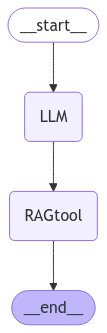

In [59]:
from IPython.display import Image, display

try:
    display(Image(app4.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [60]:
inputs = {"messages": ["Tell me about Transformer"]}

In [61]:
for output in app4.stream(inputs):
    # stream() yields dictionaries with output keyed by node name
    for key, value in output.items():
        print(f"Output from node '{key}':")
        print("---")
        print(value)
    print("\n---\n")

Output from node 'LLM':
---
{'messages': ['Tell me about Transformer', 'A neural network architecture for sequence-to-sequence tasks.\n']}

---

Output from node 'RAGtool':
---
The document mentions "transformer", "transformers", and "Transformers are the most highly efficient electrical devices. Most of the transformers have full".


---



# Level 4 Workflow
After giving the question to the  agent, agent  will give output and based on that output we are going to decide, whether we will do llm call or rag call

In [62]:
loader2 = DirectoryLoader('Data/',
                            glob="*.pdf",  # Load Only Pdf documents
                            loader_cls=PyPDFLoader)
docs2=loader2.load()
text_splitter=RecursiveCharacterTextSplitter(
    chunk_size=100,
    chunk_overlap=50
)
new_docs2 = text_splitter.split_documents(documents=docs)
doc_strings2 = [doc.page_content for doc in new_docs]

In [63]:
db2 = Chroma.from_documents(new_docs2, embeddings)
retriever2 = db2.as_retriever(search_kwargs={"k": 3})

In [64]:
query = "Tell me about  the Types of transformers?"
docs = retriever2.get_relevant_documents(query)
print(docs[0].metadata)
print(docs[0].page_content)

for doc in docs:
    print(doc)

{'page': 1, 'source': 'Data\\transformer.pdf'}
Transformers can be classified on different basis, like types of construction, types of cooling
page_content='Transformers can be classified on different basis, like types of construction, types of cooling' metadata={'page': 1, 'source': 'Data\\transformer.pdf'}
page_content='(A) On the basis  of construction , transformers can be classified into two types as;' metadata={'page': 1, 'source': 'Data\\transformer.pdf'}
page_content='Transformers are the most highly efficient electrical devices. Most of the transformers have full' metadata={'page': 5, 'source': 'Data\\transformer.pdf'}


1. TypedDict:
- TypedDict is a special type that allows you to define a dictionary in Python where each key has a specific type.
It’s useful when you want to enforce type checks on the keys and values of a dictionary.

2. Annotated:
- Annotated is used to add metadata or constraints to a type.
It’s typically used for adding additional information, like constraints or descriptions, to the type.

3. Sequence[BaseMessage]:
- Sequence is a generic type from Python's typing module that represents a list-like structure (such as a list or tuple) where the order matters, and you can access elements by their position.

4. BaseMessage:
- Basemessage: This assumes you're working with the LangChain framework, and BaseMessage is part of its core messaging system. It is typically used when handling or processing messages in LangChain's workflows

5. operator.add:

- operator.add is a function from Python’s operator module that performs addition (+) on its arguments.
In this context, operator.add is being used as metadata for the Annotated type, likely suggesting that the sequence of BaseMessage objects is meant to be "added" or concatenated with another sequence at some point. It’s an indicator of how the messages field will be treated in the logic of your program.


- **TopicSelectionParser:** A Pydantic model that defines two fields (Topic and Reasoning), both of which are required to be strings.
- **Field:** Adds metadata, like descriptions, and can also be used for validation and constraints.
- **Pydantic’s Role:** Ensures that the data matches the expected structure and types, raising validation errors if the data is invalid.

In [65]:
from typing import TypedDict, Annotated, Sequence
import operator
from langchain_core.messages import BaseMessage
from langchain.prompts import PromptTemplate

In [66]:
class AgentState(TypedDict):
    # The 'messages' field should be a sequence of strings, and we annotate it with 'operator.add'
    # This implies we might want to "add" new messages to the sequence later
    messages: Annotated[Sequence[BaseMessage], operator.add] # value is the Meta data
    # Message is key and other is value
    # Annotated add meta data
    # Sequence:- sequence of message
    # Base Message :Normal message
    # operator.add:- Add multiple messages

### Putting It All Together:

- The line messages: Annotated[Sequence[BaseMessage], operator.add] defines a field messages that:

- Must be a sequence (like a list or tuple) of BaseMessage objects.
Has the additional annotation operator.add, which suggests that this sequence is intended to support addition (i.e., concatenation of multiple sequences of messages).

messages: Annotated[Sequence[BaseMessage], operator.add]

"messages": [BaseMessage("Hello!", "Alice"), BaseMessage("Hi!", "Bob")]

In [67]:
from pydantic import BaseModel , Field # Field :- For meta data
class TopicSelectionParser(BaseModel):
    Topic: str = Field(description='Selected Topic') # Extract from question (india)
    Reasoning: str = Field(description='Reasoning behind topic selection') #detail (Detail of india )

In [68]:
from langchain.output_parsers import PydanticOutputParser
parser = PydanticOutputParser(pydantic_object=TopicSelectionParser)

In [86]:
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
```


In [69]:
# This will decide which node to call
# Cheeck if the key present in rag

def function_1(state):
    message=state["messages"]
    question=message[-1]
    print(question)
    
    template="""
    Your task is to classify the given user query into one of the following categories: [Transformer, Not Related]. 
    Only respond with the category name and nothing else.

    User query: {question}
    {format_instructions}
    """
    
    prompt = PromptTemplate(template=template,
                                    input_variables=[question],
                                    partial_variables={
                                        "format_instructions" : parser.get_format_instructions()                                    }
                                    )
    chain =  prompt | llm | parser
    
    response = chain.invoke({"question":question,"format_instructions" : parser.get_format_instructions() })

    print(response)

    return {"messages": [response.Topic]}

In [87]:
# Example for above process
# template="""
#     # Your task is to classify the given user query into one of the following categories: [India, Not Related]. 
#     # Only respond with the category name and nothing else.

#     # User query: "Tell me about India's Industrial Growth"
#     # The output should be formatted as a JSON instance that conforms to the JSON schema below.

#     # As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
#     # the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

#     # Here is the output schema:
#     # ```
#     # {"properties": {"Topic": {"description": "Selected Topic", "title": "Topic", "type": "string"}, "Reasoning": {"description": "Reasoning behind topic selection", "title": "Reasoning", "type": "string"}}, "required": ["Topic", "Reasoning"]}
#     #     """

In [88]:
# Ouput for function 1
state={"messages": ["Tell me about Transformer"]}

In [89]:
function_1(state)

Tell me about Transformer
Topic='Transformer' Reasoning="The query explicitly asks about 'Transformer'"


{'messages': ['Transformer']}

In [70]:
# Take the keyword and decide which path  to take 
def router(state):
    print('-> Router ->')
    
    messages = state["messages"]
    last_message = messages[-1]
    print(last_message)
    if 'Transformer' in last_message:
        return 'RAG Call'
    else:
        return 'LLM Call'

In [71]:
# RAG
# If transformer
def function_2(state):
    print('-> Calling RAG ->')
    messages = state['messages']
    question = messages[0] ## Fetching the user question
    print(question)

    template = """Answer the question based only on the following context:
    {context}

    Question: {question}
    """
    prompt = ChatPromptTemplate.from_template(template)
    
    print(prompt)

    retrieval_chain = (
        {"context": retriever, "question": RunnablePassthrough()}
        | prompt
        | llm
        | StrOutputParser()
        )
    result = retrieval_chain.invoke(question)
    return  {"messages": [result]}

In [73]:
# If not transformer llm
def function_3(state):
    print('-> Calling LLM ->')

    messages = state['messages']
    question = messages[0] ## Fetching the user question

    # Normal LLM call
    complete_query = "Answer the follow question with your knowledge of the real world. Following is the user question: " + question
    llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash-exp")
    response = llm.invoke(complete_query)
    return {"messages": [response.content]}

In [74]:
AgentState

__main__.AgentState

In [75]:
# Creating Workflow
from langgraph.graph import StateGraph,END # State graph for which state (llm or rag ) the value will go

workflow5 = StateGraph(AgentState) ### StateGraph with AgentState


workflow5.add_node("agent", function_1)

workflow5.add_node("RAG", function_2)

workflow5.add_node("LLM", function_3)


workflow5.set_entry_point("agent")

# Conditional edges
workflow5.add_conditional_edges(
    "agent",
    
    
    router,
    {
        "RAG Call": "RAG",
        "LLM Call": "LLM",
    }
)

workflow5.add_edge("RAG",END)


workflow5.add_edge("LLM",END)


app5=workflow5.compile()

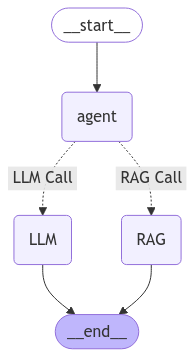

In [76]:
app5

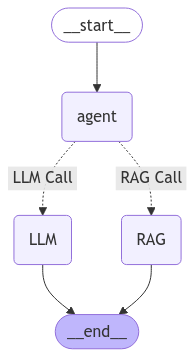

In [77]:
from IPython.display import Image, display

try:
    display(Image(app5.get_graph().draw_mermaid_png()))
except Exception as e:
    # This requires some extra dependencies and is optional
    print(e)

In [82]:
inputs = {"messages": ["Tell me about India's Industrial Growth"]}
output = app5.invoke(inputs)

Tell me about India's Industrial Growth
Topic='Not Related' Reasoning="The query is about India's industrial growth, which is not related to transformers."
-> Router ->
Not Related
-> Calling LLM ->


In [83]:
output

{'messages': ["Tell me about India's Industrial Growth",
  'Not Related',
  'Okay, let\'s talk about India\'s industrial growth. It\'s a complex and dynamic topic, so I\'ll break it down into key areas:\n\n**Historical Context:**\n\n* **Post-Independence Era (1947-1991):**  India initially adopted a mixed economy model with a strong emphasis on public sector-led industrialization. This focused on building heavy industries like steel, power, and infrastructure. While it laid the foundation, it also resulted in inefficiencies, bureaucratic hurdles, and limited private sector participation. This period was characterized by the "License Raj," where permits were needed for most economic activities.\n* **Liberalization Era (1991 onwards):**  A major economic crisis in 1991 forced India to liberalize its economy. This involved:\n    * **Deregulation:** Reducing government control and bureaucratic hurdles.\n    * **Privatization:** Opening up state-owned enterprises to private investment.\n   

In [84]:
inputs = {"messages": ["Tell me about Transformer"]}
output = app5.invoke(inputs)

Tell me about Transformer
Topic='Transformer' Reasoning='The user is explicitly asking about the topic of Transformer.'
-> Router ->
Transformer
-> Calling RAG ->
Tell me about Transformer
input_variables=['context', 'question'] input_types={} partial_variables={} messages=[HumanMessagePromptTemplate(prompt=PromptTemplate(input_variables=['context', 'question'], input_types={}, partial_variables={}, template='Answer the question based only on the following context:\n    {context}\n\n    Question: {question}\n    '), additional_kwargs={})]


In [85]:
output

{'messages': ['Tell me about Transformer',
  'Transformer',
  'The document mentions "transformer", "transformers", and "Transformers are the most highly efficient electrical devices."\n']}